In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

**AM 231 Project Report**

# Plant Disease Classification using Convolutional Neural Networks

Bernard Kleynhans, Ben Rafetto, Will Claybaugh

---

## Introduction

Crop diseases are a major threat to food security, but their timely identification remains difficult in many parts of the world due to a lack of necessary infrastructure and accessibility of information. The combination of increasing global smartphone penetration and recent advanced in deep learning is has enabled smartphone-assisted disease diagnosis [1]. Using a public dataset of 54,306 images of diseased and healthy plant leaves collected under controlled conditions and made available by the PlantVillage project, we train deep convolutional neural networks (CNN) to identify 14 crop species and 26 diseases. 

We evaluate three different approaches to improve the baseline accuracy reported by Mohanty et al. in the research paper, "Using Deep Learning for Image-Based Plant Disease Detection" in which CNN models were also used to classifiy plant diseases using the same dataset. The three approaches we investigate are Transfer Learning, Single Image Super-Resolution and hierarchical superclass Learning, all of which focus on a particular component that is unique to this dataset or image classification problems in general. 

## Related work

Plant disease identification is not a new problem, but has until recently almost solely been performed by experts through manual inspection and microscopic analysis. Given the proliferation of smartphones and advances made in computer vision and object recognition over the last few years, a number of papers have been published investigating the use of smartphones for plant disease classification. In the past, plant classification often relied on traditional computer vision techniques used to make
predictions on extracted features such as shape, color, or texture. However, with the recent success of CNNs in image classification, new plant specie / disease classification methods have shifted toward a deep learning based approach.

In the paper "Using Deep Learning for Plant Disease Detection", Mohanty, Hughes and Salathe trained a CNN model that achieved an accuracy of 99.35% on a held-out test dataset. Even though the model accuracy dropped to 31.4% when testing the model using images from other online sources, the paper concluded that approach of training deep learning models on increasingly large and publicly available datasets presented a clear path towards smartphone-assisted crop disease diagnosis on a global scale[1].

In another paper researchers employed a classification model involving Support Vector Machines (SVM), genetic algorithms (GA) and neural networks (NN) to develop a computer based vision system for automatic identification of plant species, focusing in particular on the computational efficiency of the implemented model[2].

## Dataset and Features

We use 54,306 images of plant leaves from the PlantVillage dataset to train the plant disease classification models. The dataset includes images of 14 distinct species and 20 diseases. Overall there are 38 classes in the dataset representing the relevant specie and health status (disease type or healthy) combinations included in the data.

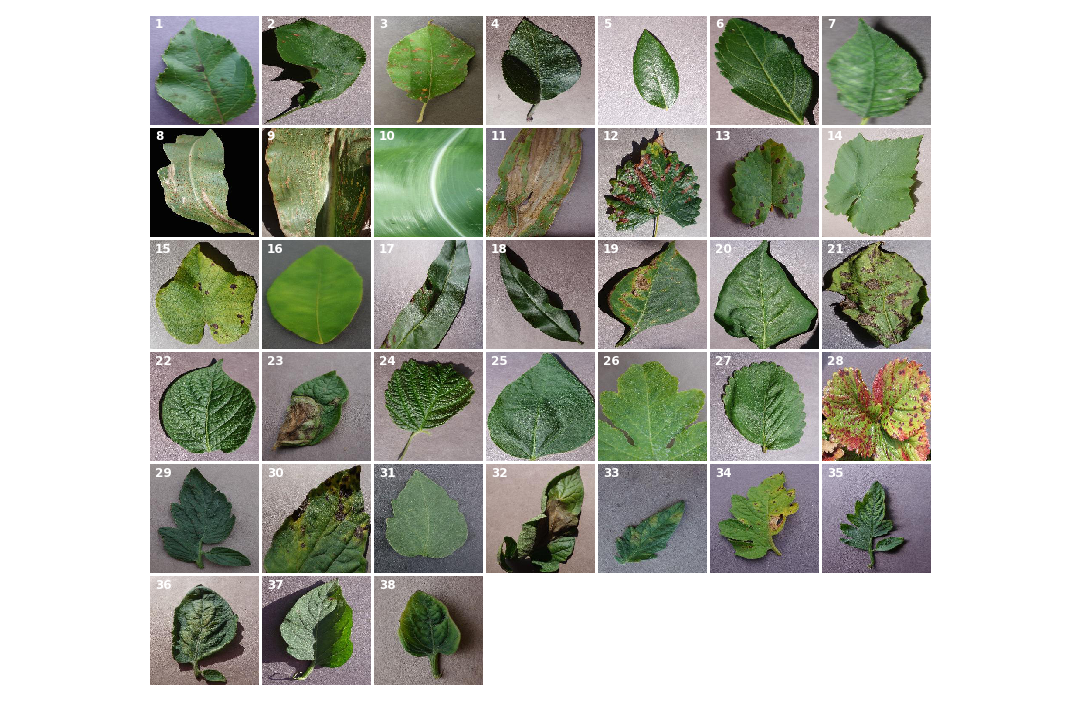

In [12]:
Image('images/image_per_specie.png')

Example of leaf images from the PlantVillage dataset, representing every
crop-disease pair used. 

*1) Apple Scab 
2) Apple Black Rot
3) Apple Cedar Rust
4) Apple healthy 
5) Blueberry healthy 
6) Cherry healthy
7) Cherry Powdery Mildew
8) Corn Gray Leaf Spot
9) Corn Common Rust
10) Corn healthy 
11) Corn N. Leaf Blight 
12) Grape Black Rot
13) Grape Black Measles 
14) Grape Healthy 
15) Grape Leaf Blight 
16) Orange Huanglongbing 
17) Peach Bacterial Spot 
18) Peach healthy 
19) Bell Pepper Bact. Spot 
20) Bell Pepper healthy 
21) Potato Early Blight 
22) Potato healthy 
23) Potato Late Blight
24) Raspberry healthy
25) Soybean healthy
26) Squash Mildew 
27) Strawberry Healthy 
28) Strawberry Leaf Scorch 
29) Tomato Bacterial Spot
30) Tomato Early Blight 
31) Tomato Late Blight 
32) Tomato Leaf Mold 
33) Tomato Leaf Spot
34) Tomato Spider Mite 
35) Tomato Target Spot 
36) Tomato Mosaic Virus
37) Tomato Yellow Leaf
38) Tomato healthy*

As can be seen in the figure below, species typically only have a small subset of the diseases in the data and only a small number of diseases are common across multiple species.

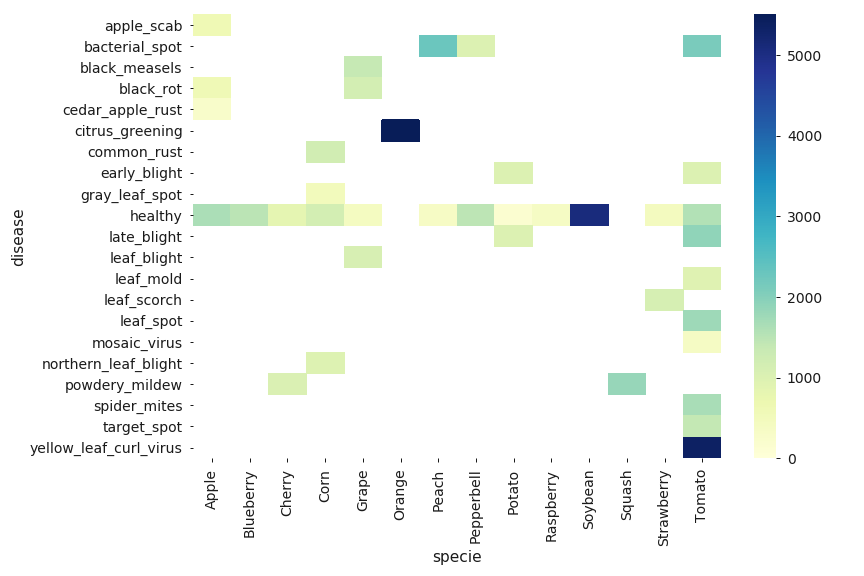

In [13]:
Image('images/specie_disease_heatmap.png')

The images were processed in three different formats: color, grayscale and segmented. The segmented images were pre-processed to remove the background. All the images have dimension 256 x 256 pixels. Overall, we note that the image were taken in a controlled environment and that the quality of the images and position of the leaves within the images are very consistent.

By analyzing the difference in accuracy between the different image types we hope to gain some understanding of how well models might generalize to another plant disease dataset. We also use a number of image augmentation methods, discussed in more detail later in the report, to improve the robustness of the model.

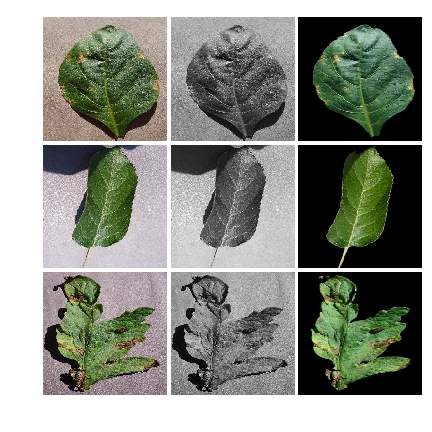

In [14]:
Image('images/image_types.png')

## Methodologies

### Transfer Learning

We employ a pre-defined architecture based on Google's Inception network and pre-trained weights to fit baseline classification models. This approach is common in image classification tasks as it makes effective use of the information in a network that has been trained on a different dataset. In particular, we expect there to be similarities between CNN models used for image classification even if the objects being classified are different. This has the advantage of potentially decreasing training time and possibly improving accuracy as the model includes information that could not be obtained from the training data alone.

The Inception network takes several convolutional kernels of different sizes and stacks their outputs along the depth dimension in order to capture features at different scales. The network also borrows the concept of a residual network with skip connections where the input is added to the output so that the model is forced to predict the residual rather than the target itself. The network architecture was proposed in the paper "Going Deeper with Convolutions", with its might hallmark being the improved utilization of computing resource inside the network [3].

The main idea employed in the network is to consider how an optimal local sparse structure of a convolutional vision network can be approximated and covered by readily available dense components. The network makes efficient use of the available information by learning the optimal filter size in some layers.

**Validation**

We consider a three different train and test splits to analyse the validation accuracy of the model:

* 70 training / 30 validation
* 50 training / 50 validation
* 30 training / 70 validation

**Data processing and augmentation**

We scale each of the images using bicubic interpolation to have the correct input size required by the Inception network (299 x 299 pixels). We use a built-in generator in `Keras` to augment the input images, applying a number of tranformations on the input such as: rotations, horizontal flips, zoom, width and height shifts. We note that such transformations should improve the generalizability of the model given how normalized and controlled the input images are.

**Loss function and optimizer**

Given the multi-class nature of this classification problem, we use a categorical cross-entropy as the loss function on the last fully-connected layer. 

We employ the Adam optimization algorithm, which is an extension of Stochastic Gradient Descent (SGD). The algorithm does not maintain the same learning rate like SGD, but has adaptive learning rate. It combines the advantages of two other extension of SGD called Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp), by considering both the first and second moments of the gradients.

In addition, we also included callbacks to reduce the learning rate by a factor by 0.2 if the validation accuracy did not improve for a period of 5 epochs.

**Training**

The model were all run for 20 epochs with each epoch consisting of 500 training and validation steps. The models were trained using Nvidia Tesla K40 GPUs on Harvard's High Performance Computing Cluster (Odyssey) and took in the order of 12 hours to train in parallel.

### Super-Resolution 

In order to use pre-trained networks, input images need to be scaled to the dimension required by the relevant network (299 x 299 pixels for the Google Inception network). Rather than using bicubic interpolation to scale images, we use a method that directly learns an end-to-end mapping between low and high-resolution images using a Super-Resolution CNN (SRCNN)

**Super-Resolution Convolutional Neural Networks (SRCNN)**

Super-resolution is the process of increasing the resolution and quality of an image. Recently, deep-learning based super-resolution methods have been shown to outperform basic interpolation methods in terms of aesthetic value to humans and pixel signal to noise ratio. We investigate whether super-resolution can also be used to enhance the discriminative features of images in order to improve the classification performance of the CNN model.

We implement the Super-Resolution Convolutional Neural Network (SRCNN) proposed by Chao and Chen in the paper "Image Super-Resolution Using Deep Convolutional Networks". The network structure is very simple and compact, yet is shown to provide superior accuracy compared to state-of-the-art example-based methods.

Given a low-resolution image Y, the first convolutional layer of the SRCNN extracts a set of feature maps. The second layer maps these feature maps nonlinearly to high-resolution patch representations. The last layer combines the predictions within a spatial neighbourhood to produce the final high-resolution image. [4]

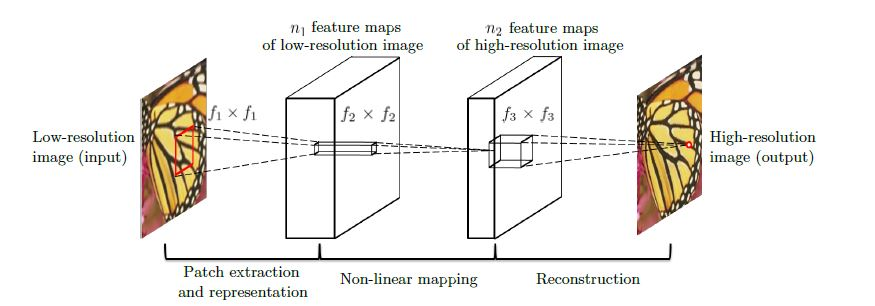

In [20]:
Image('images/SRCNN_diagram.png')

In the figure above $f_k \times f_k$ represents the size of the filters used in the $k$-th layer and $n_k$ is the number of filters included in the $k$-th layer. We use the basic configuration used in the paper with $f_1 = 9$, $f_2 = 1$, $f_3 = 5$ and $n_1 = 64$ and $n_2 = 32$ and 3 channels.

The network is trained by minimizing the loss between the reconstructed images and the ground truth high-resolution images. We use Mean Squared Error (MSE) as the loss function. Using MSE favors a high Peak Signal to Noise Ratio (PSNR), which is a widely used metric for evaluating image reconstruction quality. 

As a first attempt we train the SRCNN model using images from a widely used benchmark dataset (set 14) with 14 low/high resolution images. Note that the model is trained on small patches of the low and high resolution images. We then also investigate if better performance can be obtained by training on a small subset of the plant disease data. For the second case, we don't have a ground truth high resolution image (299 x 299) so we scale down the original images to learn a general mapping between low and high resolution images. Although we make a compromise by not having the correct target solution, this should be offset by the images being more relevant for the classification problem.

**Bicubic interpolation**

Bicubic interpolation is an extension of cubic interpolation for interpolating data points on a two-dimensional regular grid, which in our case represents the pixels in an image. The interpolation can be achieved using Lagrange polynomials, cubic splines or a cubic convolution algorithm . Bicubic interpolation is more complex and more computationally expensive than comparable methods such as bilinear interpolation and nearest-neighbor interpolation, but typically produces better results for image resampling. 

### Superclass Learning

**Problem Inspiration**

As originally designed, this problem includes 38 categories: 21 different disease status applied across 14 plant species. This hierarchical structure and the fact that certain diseases only afflict particular plants raised the question of whether we could improve model accuracy by treating plant categorization separately from disease categorization.

**Existing Literature**

Hierarchical problems such as this have been tackled previously, particularly in applications towards biological problems. Cerri, Barros et al [5] introduce an approach they term Hierarchical Multi-Label Classification with Local Multi-Layer Perceptrons (HMC-LMLP) to perform protein function prediction via a set of sequentially trained neural networks, and further refine their results in further work [6], in both cases achieving results comparable to state of the art for protein application. However, other literature on HMC is particularly targeted at similar biologically oriented problems, and discussion of applications towards image classification is very limited.

**Model Design**

We tried several approaches, including entirely separate neural networks as well as feeding intermediate layers back and forth, but found the optimal structure to involve a certain degree of sharing convolutions, while feeding only the final plant type estimation back to the main branch. In order to minimize parameters and therefore training time, and because we suspected many of the features required to process images or determine plant/species types should be shared, we established an initial shared convolution layer, which then fed branching neural networks with separate loss functions, with the result of the leaf (superclass) categorization fed into the final layer of the disease classification network.

Both because the problem of plant estimation is significantly easier (fewer classes and more variation between them) and because it is only tertiary to the more important problem of overall classification, we setup the leaf (superclass) network to use significantly fewer nodes at each level than the main branch. As such, we were able to add the entire superclass structure to the neural network while adding fewer than 10% additional parameters. Despite this, results are promising and show significant improvement over comparable baseline models.

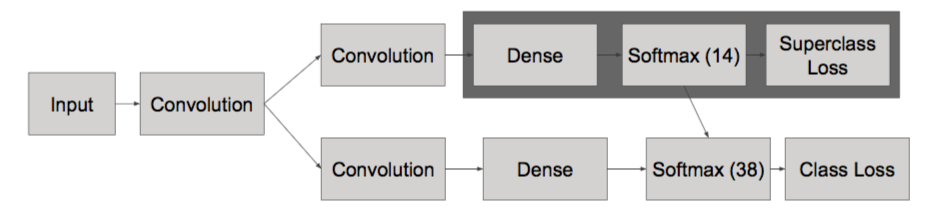

In [4]:
Image('images/superclass_structure.png')

**Results**

With very little additional training time or parameters, the superclass learning approach significantly outperformed the baseline model. We were able to improve from approximately 60% accuracy with a small neural network (<1M parameters) to greater than 75% accuracy with an identical network except for the addition of the secondary classification branch.

### Add picture

**Further Exploration**

We believe this approach shows significant promise, and it would be interesting to explore generalizing this model to other classification problems with additional layers, or to feed in expert knowledge such as which diseases afflict only certain plants. Although our networks should be able to learn these features, it would be interesting to see if we can achieve higher accuracy or quicker training by imposing these constraints directly into the model.

## Results

### Transfer Learning

Using the transfer learning approach we are able to achieve a validation accuracy of 99.5%, which is in line with the accuracy reported by Mohanty, Hughes and Salathe [1]. In the figure below we show the validation accuracy achieved after 20 epochs for each of train/test split and image type combinations we considered. Unsurprisingly using color images and the maximum amount of training data provides the best results. Given the importance of color in identifying certain plant diseases it also makes sense that the grayscale images tended to provide the worst classification performance.

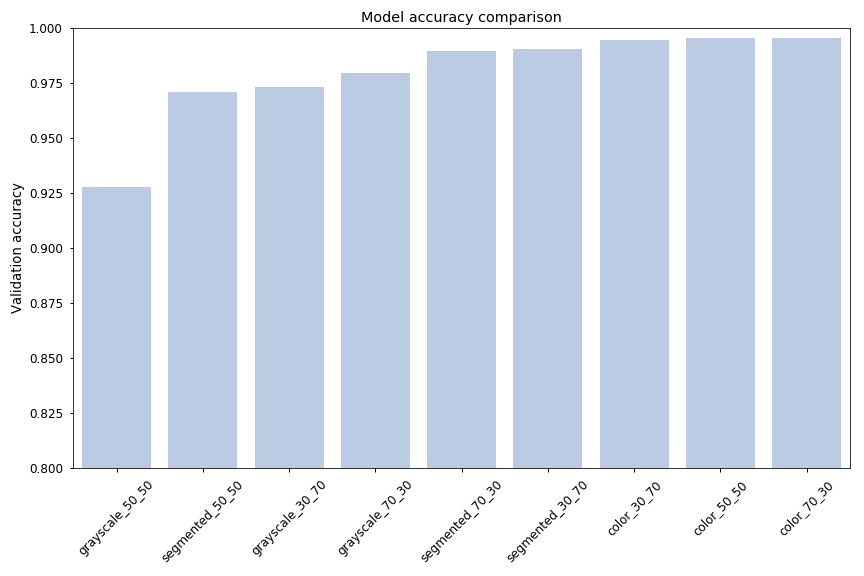

In [16]:
Image('images/model_comparison.png', width=650)

The figure below shows the training accuracy by epoch for the different train/test splits used for color images. After 20 epochs the 3 models have very similar training accuracy. Note that the step increases in accuracy occurred when the learning rate was reduced by a factor of 0.2 using, after not observing any improvement in validation accuracy for 5 epochs.

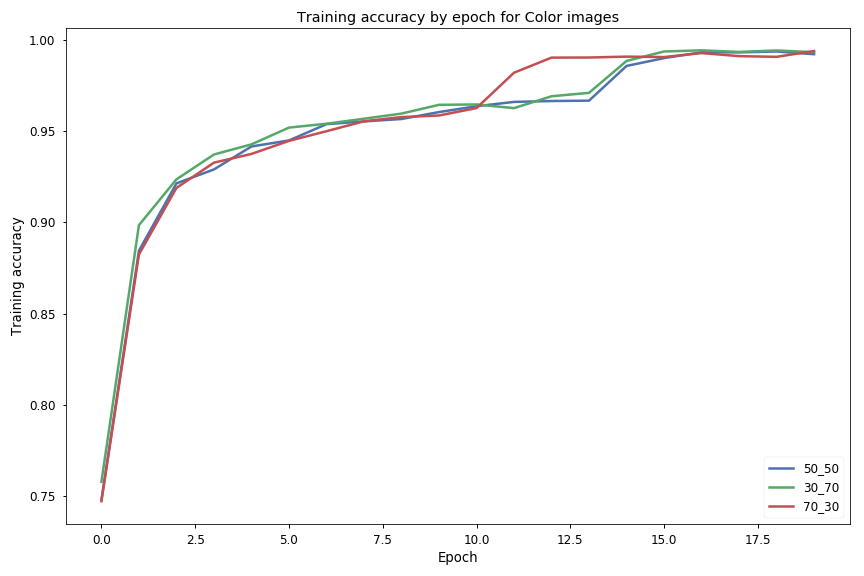

In [18]:
Image('images/training_acc_epoch.png', width=650)

The model trained using the color images and a 70/30 train-test split achieved a validation accuracy of 99.5%, which means only 77 labels were misclassified out of 16,216 validation images. Looking at the confusion matrix below we note that most os the misclassifications are centered around the diagnonal, indicating that most of the misclassifications likely had the correct specie, but misclassified the disease (the labels are ordered by specie). 

We also note there are 16 cases (representing 20% of errors) where the model incorrectly classified *Corn Northern Leaf Blight* as *Corn Gray Leaf Spot*

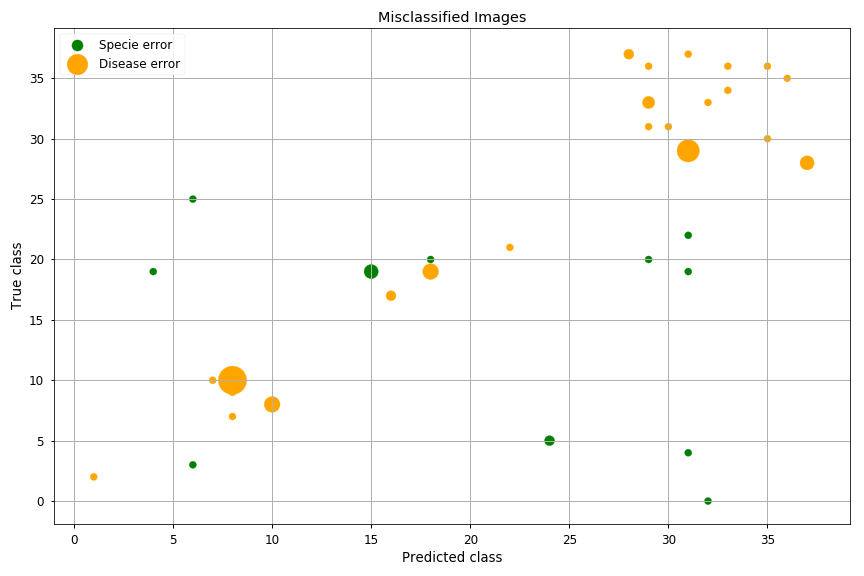

In [17]:
Image('images/misclassified_images.png', width=650)

Below we include a number of images of the "Corn Northern Leaf Blight" and ""Corn Gray Leaf Spot" leaves to demonstrate how similar these diseases appear visually, which explains the high relative confusion between these two classes.

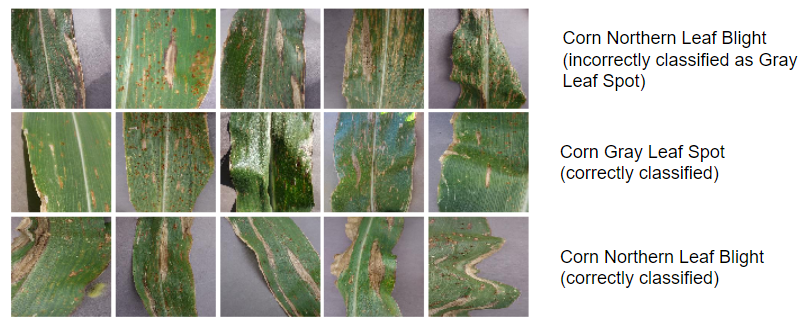

In [6]:
Image('images/corn_comparison.png', width=700)

Overall the transfer learning approach provides very good classification results. We note some concerns about the very high classification accuracy, which likely indicates that the image set is not sufficiently diverse and that the model will likely not generalize that well to different plant disease datasets. We discuss this in more detail in a later section.

### Super-Resolution 

As noted above we implemented a SRCNN model that learns a direct mapping between low and high resolution images. Below we show the results for the SRCNN model trained on a commonly used benchmarking dataset consisting of 14 low and high resolution images. 

We tested the SRCNN model by first scaling down all input images by a factor of 4 using bicubic interpolation (i.e. scaling images from 256 x 256 to 64 x 64 pixels). We then scale images back up to the input size required by the Inception network (299 x 299) using bicubic interpolation and the trained SRCNN model. Using the two datasets we train new CNN models based on the Inception Network to compare the impact of the two scaling methods on classification performance.

As can be seen in the figures below, the classification accuracy achieved by the two scaling methods are almost identical. It appears like the CNN trained using the SRCNN images might have converged slightly quicker, but further testing would be required to confirm this.

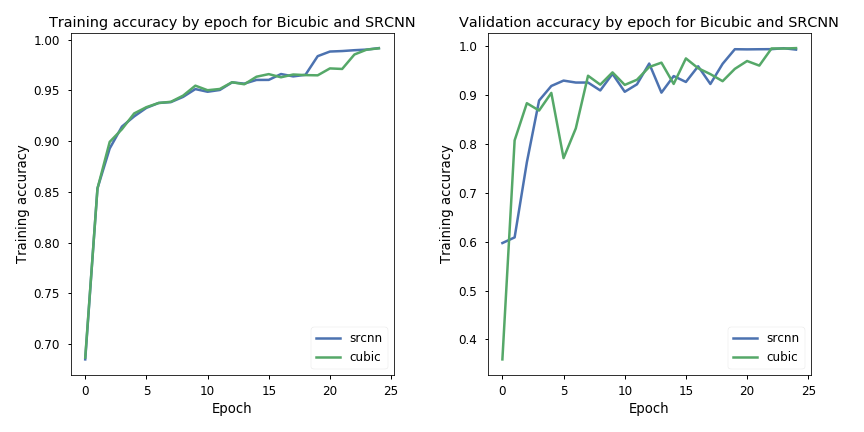

In [29]:
Image('images/srcnn_training_acc_epoch.png')

The SRCNN model is compact and contains a small number of parameters compared to standard image classification networks. However, it still a lot more computationally expensive to scale images using this method compared to standard interpolation methods, making bicubic interpolation the preferred scaling method for this problem given that the two methods produce models with very similar classification accuracy.

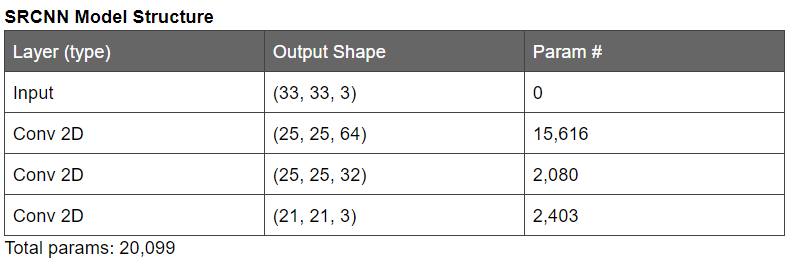

In [35]:
Image('images/srcnn_structure_new.png', width=650)

### Outcome Concerns

Because of the nature of the image dataset and the large number of inputs to this problem, we have some concerns about the possibility of overfitting in our models.

First, the images are extremely sterile, lab-taken, and normalized so each leaf is oriented almost exactly vertical. When combined with the fact that the dataset consists of fifty-four thousand images in only 38 categories and many of the leaf images are extremely similar, regardless of the split between training and validation, there will be a large degree of overlap between the two sets. This makes us less confident in the quality of our validation, and especially in the ability of this learning to transfer to identifying a grainy photo taken in different lighting of a different variety of the same plant, in a non-sterile environment outdoors or with a different background.

It's perhaps easiest to see this impact in the simplest model: logistic regression. When input images were fed in with no degree of data processing or augmentation, the training set simply continued to improve over time, eventually achieving 70% accuracy, while the validation set performed closer to 50%. However, when the training set was processed with small amounts of rotation, shifting, shearing, zooming, and horizontal flipping, the training and test validations converged around 30-35% and 35-40%, respectively. Since these normalization methods prevent overfitting, it's unsurprising that the training results decrease substantially, but if there were sufficient difference between the test and training set, the impact to the validation set should be much less, and even neglibile or positive. 

We observed this dropoff in accuracy for a variety of models, and theorize the additional 10-15% loss in accuracy when using data augmentation is caused by the lack of ability for our models to overfit to the inherent similarities between the training and validation sets.

#### Results without input regularization

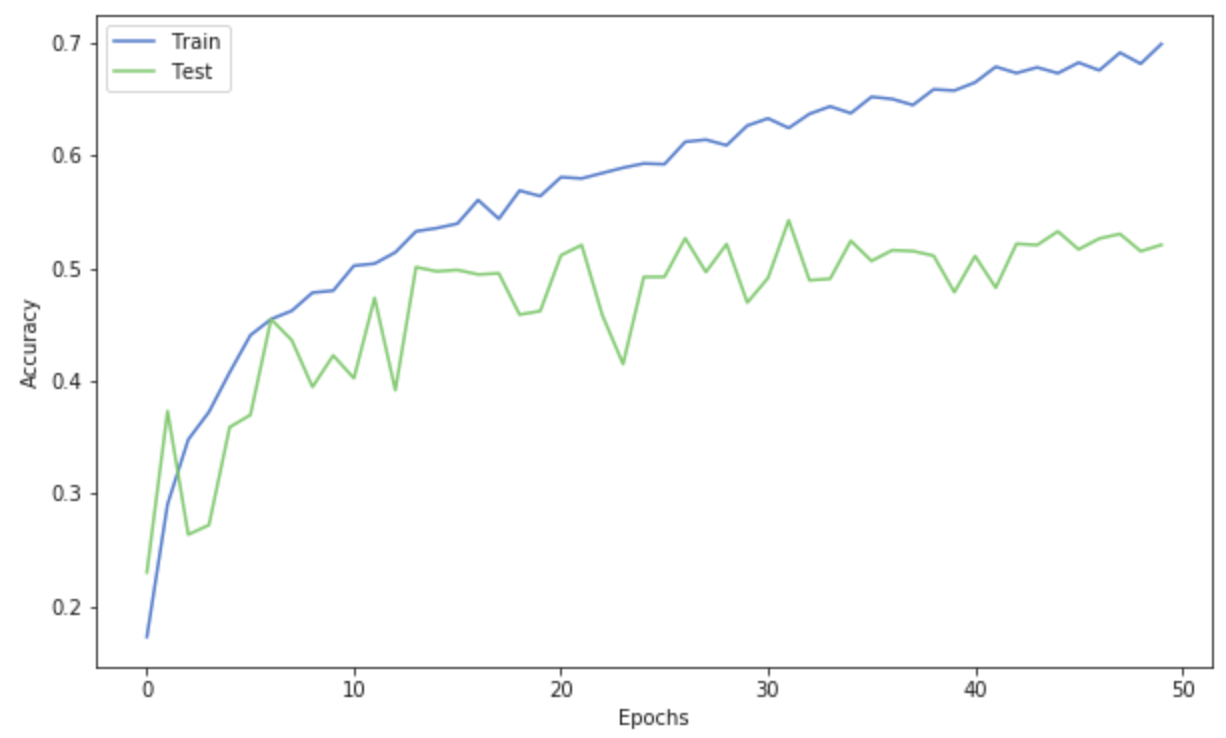

In [10]:
Image('images/logistic_regression.png', width=650)

#### Results with input regularization

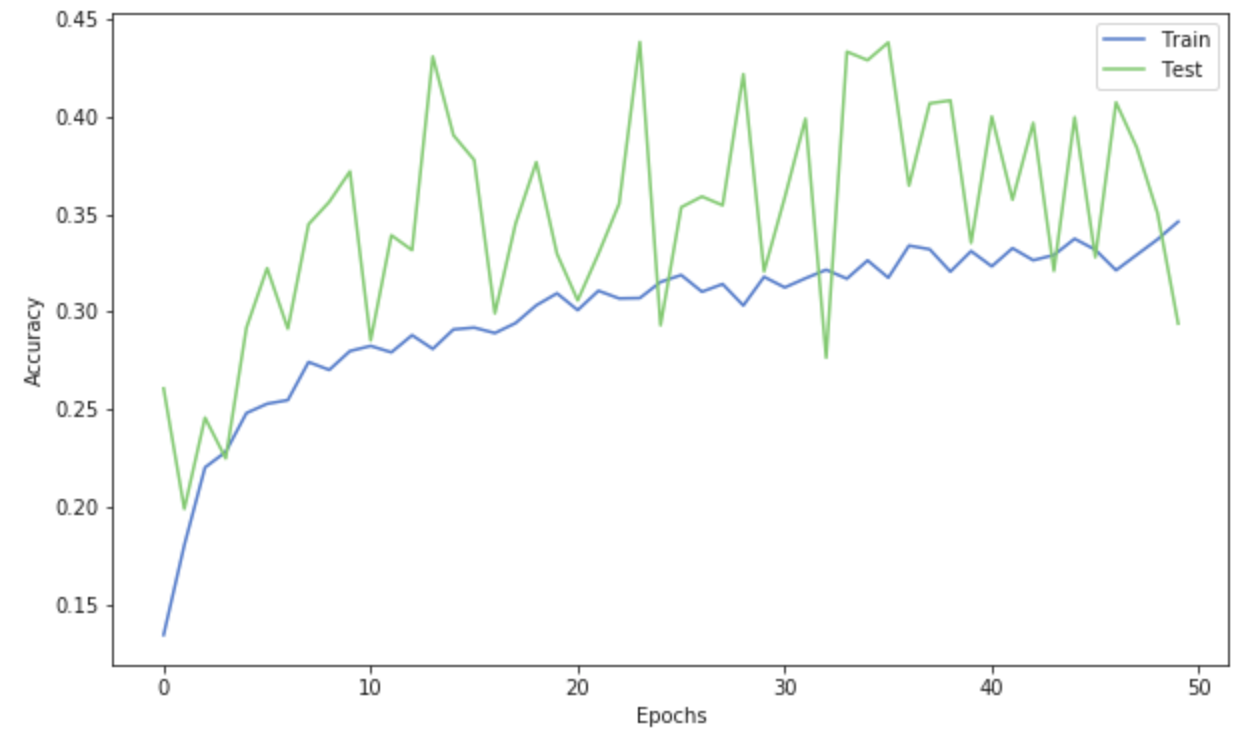

In [9]:
Image('images/logistic_regression_normalized.png', width=650)

## Conclusion and Future Work

Convolutional Neural Networks did an excellent job classifying plant images based on disease and species. As models we used increased in effectively-chosen complexity, the ability to make accurate predictions increased likewise.

Logistic regression provided a base of comparison while also elucidating some of the issues inherent to the dataset.

Superclass learning outperformed baseline comparable models, and is a promising avenue for further research. Generalizing the problem to additional layers of inheritance, or in a way that can be applied to other problems as an out of the box solution could provide interesting additional work.

Transfer learning from pre-trained image networks significantly exceeded models trained from scratch while requiring far less training time. 

Using a SRCNN model to scale images rather than using standard bicubic or nearest interpolation methods did not improve results.

And finally, as promising as these results are, concerns remain that the sterilization of photos and overlap between testing and training is concealing a degree of overfitting inherent in all our models.

Throughout this project we were able to explore the scope and variety of convolutional neural networks and compared several different approaches unique to this problem. Transfer learning far outperformed other approaches in terms of classification accuracy, largely due to the magnitude of the model and number of parameters versus other approaches, but interesting theoretical results and insight into the data were still available from using less advanced models.

## References

1. Mohanty, S.P., Hughes, D.P. and Salathé, M., 2016. Using deep learning for image-based plant disease detection. Frontiers in plant science, 7, p.1419.

2. Naik, M.R. and Sivappagari, C.M.R., 2016. Plant Leaf and Disease Detection by Using HSV Features and SVM Classifier. International Journal of Engineering Science, 3794.

3. Szegedy, C., Liu, W., Jia, Y., Sermanet, P., Reed, S., Anguelov, D., Erhan, D., Vanhoucke, V. and Rabinovich, A., 2015, June. Going deeper with convolutions. Cvpr.

4. Dong, C., Loy, C.C., He, K. and Tang, X., 2016. Image super-resolution using deep convolutional networks. IEEE transactions on pattern analysis and machine intelligence, 38(2), pp.295-307.

5. Cerri, Barros, & De Carvalho. (2014). Hierarchical multi-label classification using local neural networks. Journal of Computer and System Sciences, 80(1), 39-56.

6. Cerri, Ricardo, Barros, Rodrigo C., P. L. F. de Carvalho, Andrn C., & Jin, Yaochu. (2016). Reduction strategies for hierarchical multi-label classification in protein function prediction. BMC Bioinformatics, 17(1), 373.